<a href="https://colab.research.google.com/github/livjab/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module2-join-datasets/LS_DS_122_Join_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join datasets

Objectives
- concatenate data with pandas
- merge data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Combine Data Sets: Standard Joins
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-26 20:33:53--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.137.238
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.137.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  96.3MB/s    in 2.0s    

2019-03-26 20:33:56 (96.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


## Goal: Reproduce this example

The first two orders for user id 1:

In [5]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [6]:
!ls -lh

total 681M
-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [0]:
import pandas as pd
aisles = pd.read_csv("aisles.csv")

In [8]:
aisles.shape

(134, 2)

In [9]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
# no helpful columns in "aisles"

### departments

In [11]:
departments = pd.read_csv("departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
departments.shape

(21, 2)

In [0]:
# no helpful columns in "departments"

### order_products__prior

In [14]:
order_prior = pd.read_csv("order_products__prior.csv")
order_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
order_prior.shape

(32434489, 4)

In [16]:
order_prior.groupby("order_id")["product_id"].count().mean()

10.088883421247614

In [0]:
# we need "order_id", "product_id", "add_to_cart_order" from this dataset

### order_products__train

In [18]:
order_train = pd.read_csv("order_products__train.csv")
order_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [19]:
order_train.shape

(1384617, 4)

In [0]:
# we need "order_id", "product_id", "add_to_cart" from this dataset

### orders

In [21]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [22]:
orders.shape

(3421083, 7)

In [23]:
display(example)

In [0]:
# we need "user_id", "order_id", "order_number", "order_dow", "order_hour_of_day"

### products

In [25]:
products = pd.read_csv("products.csv")
products.shape

(49688, 4)

In [26]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
# we need "product_id", "product_name"

## Concatenate order_products__prior and order_products__train

In [28]:
order_products = pd.concat([order_prior, order_train])
order_products.shape

(33819106, 4)

## Get a subset of orders — the first two orders for user id 1

From orders dataframe:
 - order_id
 - user_id
 - order_number
 - order_dow
 - order_hour_of_day
 

In [0]:
condition = (orders["user_id"]==1) & (orders["order_number"]<=2)

columns = ["user_id",
          "order_id",
          "order_number",
          "order_dow",
          "order_hour_of_day"]

subset = orders.loc[condition, columns]

In [30]:
display(example)

In [31]:
condition = order_products["order_id"]==2539329
order_products[condition]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


## Merge dataframes

In [0]:
# merge subset from orders with columns from order_products

In [33]:
merged = pd.merge(subset,
         order_products[["order_id", "add_to_cart_order", "product_id"]])
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [34]:
final = pd.merge(merged, products[["product_id", "product_name"]])
final_final = final.sort_values(by=["order_number", "add_to_cart_order"])
final_final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [35]:
display(example)


# Assignment

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Stretch challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

In [0]:
# need "order_id", "product_id", "product_name"

From **products**
- product_id
- product_name

From **orders**
- order_id

From **order_train**
- order_id
- product_id

From **order_prior**
- order_id
- product_id

In [37]:
# concat order_prior and order_train because they have the same columns

order_products = pd.concat([order_prior, order_train])
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# merge order_products and orders
# using too much RAM with all the columns, so need to simplify

fewer_column_orders = orders[["order_id"]]
fewer_column_order_products = order_products[["order_id", "product_id"]]
fewer_column_products = products[["product_id", "product_name"]]

In [42]:
all_orders = pd.merge(fewer_column_order_products, fewer_column_orders)
all_orders.head()

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [45]:
# merge products dataset into the main

total_df = pd.merge(all_orders, fewer_column_products)
total_df.head()

,order_id,product_id,product_name
0,2,33120,Organic Egg Whites
1,26,33120,Organic Egg Whites
2,120,33120,Organic Egg Whites
3,327,33120,Organic Egg Whites
4,390,33120,Organic Egg Whites


In [46]:
total_df.shape

(33819106, 3)

In [0]:
# that adds up with what was done in lecture
# should now have all of the columns and data to get answers

In [0]:
common_products = total_df["product_name"].value_counts().head(10)

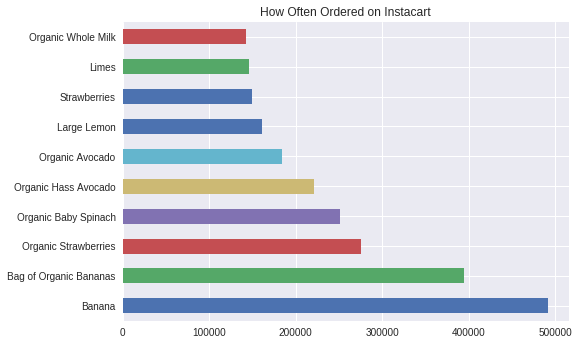

In [60]:
# matches with above information and provides the frequency counts of each
# plot for visual fun

common_products.plot.barh(title="How Often Ordered on Instacart");